In [5]:
import json

def load_jsonl(file_path: str) -> list[list[dict]]:
    """
    Load and parse a file where each line is a JSON-encoded string representing
    a participant's response data across trials.

    Args:
        file_path: Path to the file containing the data.

    Returns:
        participants_data: Inner lists contain recorded entries for a participant and trial.
    """
    participants_data = []
    with open(file_path, "r") as file:
        for line in file:
            try:
                participant_data = json.loads(line.strip())
                participants_data.append(participant_data)
            except json.JSONDecodeError as e:
                print(f"Error parsing line: {e}")
    return participants_data


def retrieve_conditions(participants_data: list[list[dict]]) -> list[str]:
    """
    Retrieve the condition of each participant from the data.

    Args:
        participants_data: List of lists of dictionaries, where each inner list contains recorded entries for a participant and trial.

    Returns:
        conditions: Contains the condition of each participant.
    """
    conditions = []
    for participant_data in participants_data:
        condition = [
            1 if (entry["ranked_order"][-1]["team"] == "Opposing Team") else 0
            for entry in participant_data
            if entry.get("trial_type") == "two-team-sortable-rank"
        ]
        conditions.append(condition[0])
    return conditions


def retrieve_subj_demographics(participants_data: list[list[dict]]) -> list[dict]:
    final_rankings = []
    for participant_data in participants_data:
        final_ranking = [
            (entry["response"]["race"], entry["response"]["gender"], entry["response"]["age"], entry["response"]["college"])
            for entry in participant_data
            if type(entry.get("response")) is dict and entry["response"].get("race") is not None
        ]
        final_rankings.append(final_ranking)
    return final_rankings


def retrieve_final_ranking(participants_data: list[list[dict]]) -> list[list[str]]:
    """
    Retrieve the final ranking of items from the data.

    Args:
        participants_data: List of lists of dictionaries, where each inner list contains recorded entries for a participant and trial.

    Returns:
        final_rankings: Inner lists contain the final ranking of items for a participant.
    """
    final_rankings = []
    for participant_data in participants_data:
        final_ranking = [
            entry["ranked_order"]
            for entry in participant_data
            if entry.get("trial_type") == 'two-team-sortable-rank'
        ]
        final_rankings.append(final_ranking)
    return final_rankings

def generate_subject_ids(participants_data: list[list[dict]]) -> list[int]:
    """
    Selects unique subject id from item-presentation trials across all participants.

    Args:
        participants_data: List of lists of dictionaries, where each inner list contains recorded entries for a participant and trial.

    Returns:
        Contains subject id for a participant and trial combination.
    """
    subject_ids = []
    for subject_id, participant_data in enumerate(participants_data):
        subject_ids.extend(
            subject_id
            for entry in participant_data
            if entry.get("trial_type") == "item-presentation"
        )
    return subject_ids

def extract_race_gender_age(url):
    # Extract the final part of the URL (filename without extension)
    filename = url.split('/')[-1].split('.')[0].lower()
    return filename.split('_')[2:]

In [6]:
jatos_data_path = "/Users/jordangunn/jatos/study_assets_root/online_experiments/experiments/sortablerank/Team_Building_2_11_4.jsonl"

data = load_jsonl(jatos_data_path)
final_rankings = retrieve_final_ranking(data)
conditions = retrieve_conditions(data)
subject_demographics = retrieve_subj_demographics(data)

# analyses used: subject age, gender, race, 
# dcharacter race, age, gender
# generated "shared_features" column
# output position. "chosen" extracted from output positions

merged = {
    "subject": [], # ✅
    "output": [], # ✅
    "chosen": [], # ✅
    "condition": [], # ✅
    "subject_race": [], # ✅
    "subject_age": [], # ✅
    "subject_gender": [], # ✅
    "character_race": [], # ✅
    "character_age": [], # ✅
    "character_gender": [], # ✅
    "subj_college": [], # ✅
    "self_ability": [], # x
    "awareness": [], # x
    "shared_features": [], # x
}

for i in range(len(data)):
    subject_id = i+1
    condition = conditions[i]
    subject_rankings = final_rankings[i][0]
    subject_race, subject_gender, subject_age, subject_college, = subject_demographics[i][0]

    output = 0
    for character in subject_rankings:
        character_demographics = extract_race_gender_age(character["label"])
        if not character_demographics:
            continue
        character_race, character_gender, character_age = character_demographics
        output += 1
        chosen = int(character['team'] == 'Your Team')
        print(character_race, character_gender, character_age)

east-asian male 21
black male 18
white male 41
south-asian female 51
white male 25
black female 23
white female 30
south-asian male 44
latino female 48
south-asian male 24
east-asian male 27
black male 30
black male 35
south-asian female 21
latino male 50
latino female 22
black female 38
latino female 30
latino female 32
east-asian male 24
latino male 31
black male 23
black female 23
east-asian female 38
latino female 42
white male 43
latino male 23
east-asian female 29
black female 30
east-asian male 23
white male 21
white female 43
east-asian male 56
white male 38
white male 43
latino male 44
east-asian female 34
white female 36
black female 18
south-asian female 24
latino male 38
black female 36
white male 35
white male 25
white female 43
white female 32
white female 22
south-asian female 35
south-asian female 21
east-asian male 41
south-asian male 29
south-asian female 28
white male 26
white male 36
south-asian male 30
white female 33
east-asian male 24
black female 39
black male 3

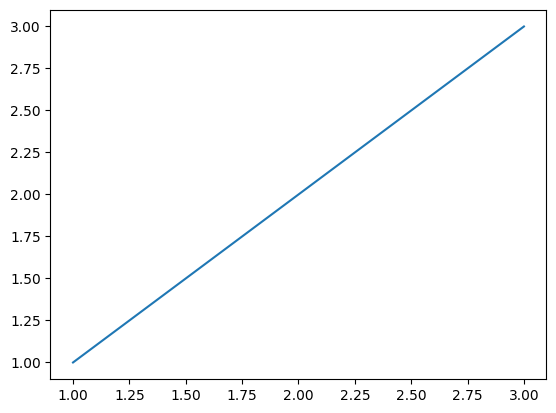

In [7]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1, 2, 3])